<a href="https://colab.research.google.com/github/alessandrossC/ML-for-people/blob/main/%22HW_%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D1%96%D1%97_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [1]:
import pandas as pd

In [4]:
file_path = '/content/marketing_campaign.csv'
df = pd.read_csv(file_path, delimiter='\t')

In [5]:
info = df.info()
missing_values = df.isnull().sum()

info, missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

(None,
 ID                      0
 Year_Birth              0
 Education               0
 Marital_Status          0
 Income                 24
 Kidhome                 0
 Teenhome                0
 Dt_Customer             0
 Recency                 0
 MntWines                0
 MntFruits               0
 MntMeatProducts         0
 MntFishProducts         0
 MntSweetProducts        0
 MntGoldProds            0
 NumDealsPurchases       0
 NumWebPurchases         0
 NumCatalogPurchases     0
 NumStorePurchases       0
 NumWebVisitsMonth       0
 AcceptedCmp3            0
 AcceptedCmp4            0
 AcceptedCmp5            0
 AcceptedCmp1            0
 AcceptedCmp2            0
 Complain                0
 Z_CostContact           0
 Z_Revenue               0
 Response                0
 dtype: int64)

**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

In [7]:
# Заповнюємо пропущені значення медіаною для стовпця "Income"
df['Income'].fillna(df['Income'].median(), inplace=True)

# Перевіряємо результат
missing_values_after = df.isnull().sum()

missing_values_after


<ipython-input-7-24bb19da647c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Для стовпця Income, оскільки пропущених значень відносно небагато (24 з 2240), я виберу медіану, щоб уникнути впливу крайніх значень, якщо розподіл доходів асиметричний.



**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [10]:

df_encoded['Dt_Customer'] = pd.to_datetime(df_encoded['Dt_Customer'], dayfirst=True)


df_encoded['Year_Joined'] = df_encoded['Dt_Customer'].dt.year
df_encoded['Month_Joined'] = df_encoded['Dt_Customer'].dt.month
df_encoded['Days_Joined'] = (pd.to_datetime('today') - df_encoded['Dt_Customer']).dt.days

df_encoded.drop(columns=['Dt_Customer'], inplace=True)

# Перевіряємо перші кілька рядків
df_encoded.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Year_Joined,Month_Joined,Days_Joined
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,False,False,False,True,False,False,False,2012,9,4597
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,False,False,False,True,False,False,False,2014,3,4047
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,False,False,False,False,True,False,False,2013,8,4246
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,False,False,False,False,True,False,False,2014,2,4073
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,False,False,True,False,False,False,False,2014,1,4095


**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Вибір даних для кластеризації (усі стовпці, окрім ID, який не є ознакою для кластеризації)
X = df_encoded.drop(columns=['ID'])

# Виконання кластеризації KMeans на 3 кластери
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Обчислення метрики силуету
silhouette_avg = silhouette_score(X, y_kmeans)

silhouette_avg

np.float64(0.5378508053251477)

**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [13]:
import plotly.express as px

# Вибираємо ознаки для візуалізації
df_viz = df_encoded[['Income', 'NumWebPurchases', 'NumStorePurchases']].copy()
df_viz['Cluster'] = y_kmeans  # Додаємо кластер до даних

# Створення 3D графіку
fig = px.scatter_3d(df_viz, x='Income', y='NumWebPurchases', z='NumStorePurchases', color='Cluster',
                    title="3D Visualization of Clusters Based on Income, Web Purchases, and Store Purchases",
                    labels={'Income': 'Income', 'NumWebPurchases': 'Web Purchases', 'NumStorePurchases': 'Store Purchases'},
                    color_continuous_scale='Viridis')

fig.show()

Кластери з високим доходом: У верхній частині графіка можна побачити групи, які мають високий дохід (більше 300k). Це вказує на користувачів з високим рівнем доходу, які, ймовірно, можуть купувати більше як в онлайн-магазинах, так і в фізичних магазинах. Ці користувачі, ймовірно, належать до одного з кластерів, де є висока активність у покупках.

Кластери з середнім доходом: У центрі графіка є велика кількість точок, що свідчить про користувачів з середнім доходом. Вони можуть мати помірну активність як в онлайн, так і в фізичних магазинах. Цей кластер виглядає досить компактним і має розподіл як по доходу, так і по кількості покупок.

Кластери з низьким доходом: Знизу праворуч можна побачити точок із низьким доходом (близько 100k і нижче), що, ймовірно, вказує на користувачів з низьким рівнем доходу. Вони, можливо, роблять менше покупок, але все одно є активними в певних сегментах ринку.
Загалом, кластери мають сенс: високий дохід, як правило, корелює з високою активністю в покупках, а низький дохід часто зумовлює меншу кількість покупок. Це дає чітке розуміння поведінки користувачів, що може бути корисно для сегментації та таргетування маркетингових кампаній.

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [15]:
from sklearn.preprocessing import StandardScaler

# Масштабуємо дані
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Виконуємо кластеризацію KMeans на масштабованих даних
kmeans_scaled = KMeans(n_clusters=3, random_state=42)
y_kmeans_scaled = kmeans_scaled.fit_predict(X_scaled)

# Обчислюємо метрику силуету для масштабованих даних
silhouette_avg_scaled = silhouette_score(X_scaled, y_kmeans_scaled)

silhouette_avg_scaled


np.float64(0.11160357322292873)

Масштабування не покращило результат кластеризації в цьому випадку, можливо через те, що певні ознаки мали важливу роль у визначенні кластерів і масштабування їх "пригнітило". Це може вказувати на те, що для цього набору даних масштабування не завжди є корисним кроком перед кластеризацією.


**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [19]:
# Заміна викидів на медіану для кожної ознаки
for column in ['Income', 'NumWebPurchases', 'NumStorePurchases']:
    median_value = df_encoded[column].median()
    df_encoded[column] = df_encoded[column].apply(lambda x: median_value if x < lower_bound[column] or x > upper_bound[column] else x)

# Перевіряємо перші кілька рядків після заміни викидів
df_encoded[['Income', 'NumWebPurchases', 'NumStorePurchases']].head()

,Income,NumWebPurchases,NumStorePurchases
0,58138.0,8.0,4
1,46344.0,1.0,2
2,71613.0,8.0,10
3,26646.0,2.0,4
4,58293.0,5.0,6


**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

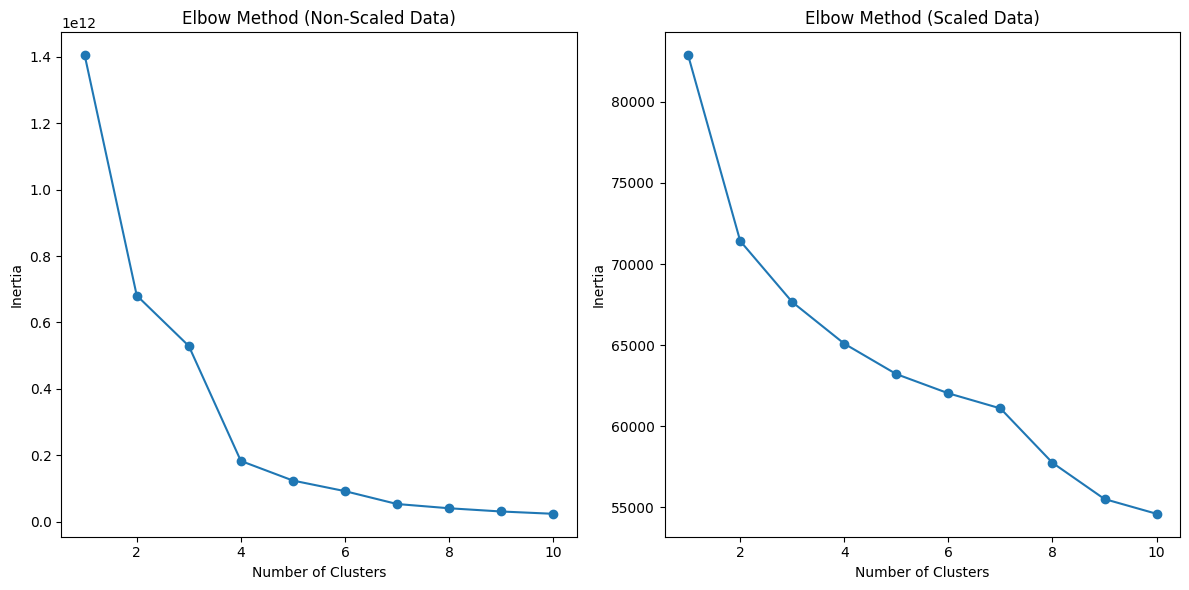

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Обчислюємо сумарну варіацію (inertia) для різної кількості кластерів
inertia_non_scaled = []
inertia_scaled = []

# Визначаємо діапазон кількості кластерів (від 1 до 10)
for k in range(1, 11):
    kmeans_non_scaled = KMeans(n_clusters=k, random_state=42)
    kmeans_non_scaled.fit(X)
    inertia_non_scaled.append(kmeans_non_scaled.inertia_)

    kmeans_scaled = KMeans(n_clusters=k, random_state=42)
    kmeans_scaled.fit(X_scaled)
    inertia_scaled.append(kmeans_scaled.inertia_)

# Візуалізуємо Elbow method
plt.figure(figsize=(12, 6))

# Графік для немасштабованих даних
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertia_non_scaled, marker='o')
plt.title('Elbow Method (Non-Scaled Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Графік для масштабованих даних
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), inertia_scaled, marker='o')
plt.title('Elbow Method (Scaled Data)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

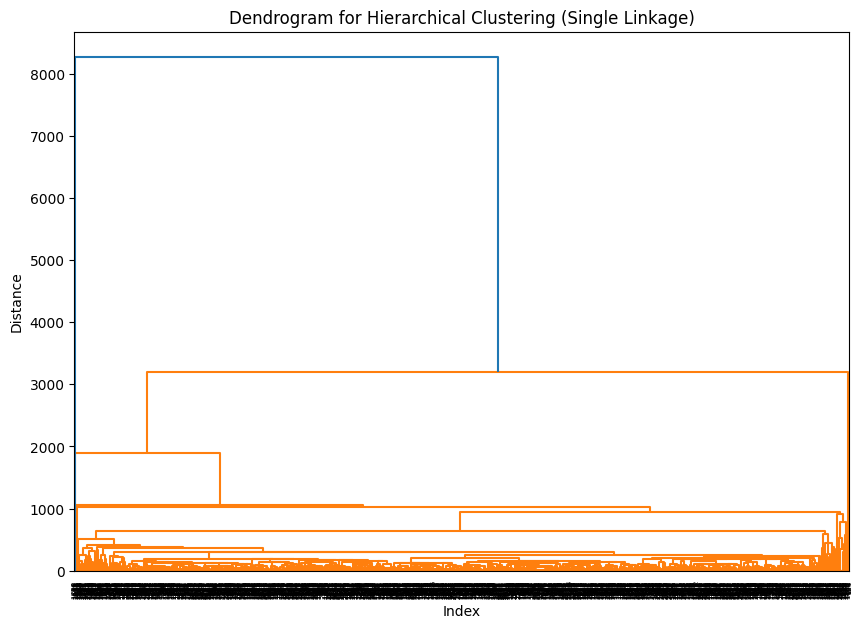

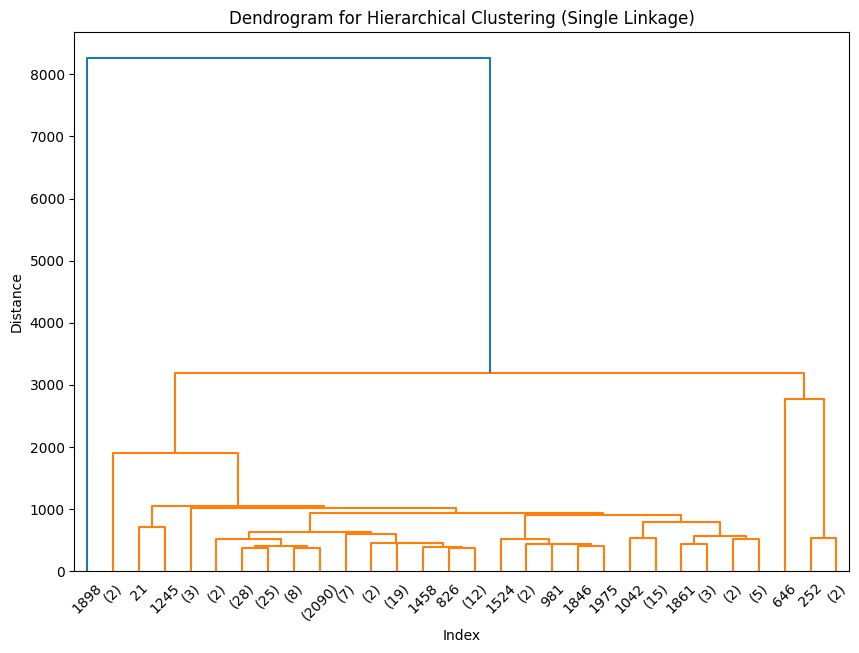

In [24]:
for column in ['Income', 'NumWebPurchases', 'NumStorePurchases']:
    median_value = df_encoded[column].median()
    df_encoded[column] = df_encoded[column].apply(lambda x: median_value if x < lower_bound[column] or x > upper_bound[column] else x)

# Використовуємо single linkage для агломеративної кластеризації на оновлених даних
Z = sch.linkage(df_encoded[['Income', 'NumWebPurchases', 'NumStorePurchases']], method='single')

# Побудова дендограми
plt.figure(figsize=(10, 7))
sch.dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering (Single Linkage)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()# Заміна викидів на медіану для кожної ознаки (менш строгий підхід)
for column in ['Income', 'NumWebPurchases', 'NumStorePurchases']:
    median_value = df_encoded[column].median()
    df_encoded[column] = df_encoded[column].apply(lambda x: median_value if x < lower_bound[column] or x > upper_bound[column] else x)

# Використовуємо single linkage для агломеративної кластеризації на оброблених даних
Z = sch.linkage(df_encoded[['Income', 'NumWebPurchases', 'NumStorePurchases']], method='single')

# Побудова дендограми з обрізкою для зручності
plt.figure(figsize=(10, 7))
sch.dendrogram(Z, truncate_mode='lastp', p=30)  # обрізаємо до останніх 30 об'єктів
plt.title('Dendrogram for Hierarchical Clustering (Single Linkage)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()



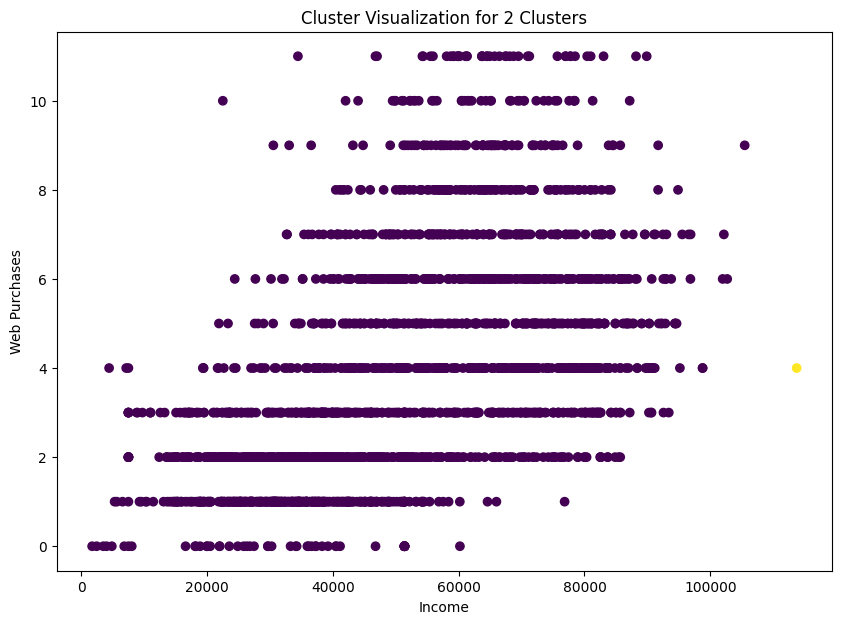

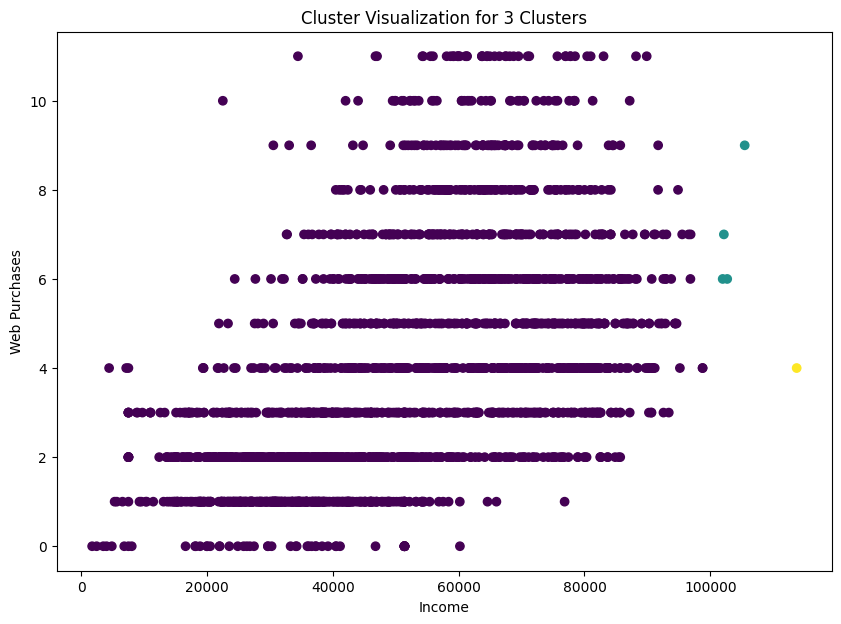

(np.float64(0.5585710601193008), np.float64(0.4520716844227346))

In [25]:
from sklearn.metrics import silhouette_score

# Використовуємо fcluster для отримання 2-х та 3-х кластерів
clusters_2 = sch.fcluster(Z, t=2, criterion='maxclust')
clusters_3 = sch.fcluster(Z, t=3, criterion='maxclust')

# Додаємо отримані кластери до даних для візуалізації
df_encoded['Cluster_2'] = clusters_2
df_encoded['Cluster_3'] = clusters_3

# Візуалізація для 2-х кластерів
plt.figure(figsize=(10, 7))
plt.scatter(df_encoded['Income'], df_encoded['NumWebPurchases'], c=df_encoded['Cluster_2'], cmap='viridis')
plt.title('Cluster Visualization for 2 Clusters')
plt.xlabel('Income')
plt.ylabel('Web Purchases')
plt.show()

# Візуалізація для 3-х кластерів
plt.figure(figsize=(10, 7))
plt.scatter(df_encoded['Income'], df_encoded['NumWebPurchases'], c=df_encoded['Cluster_3'], cmap='viridis')
plt.title('Cluster Visualization for 3 Clusters')
plt.xlabel('Income')
plt.ylabel('Web Purchases')
plt.show()

# Обчислюємо метрику силуету для кожного з варіантів кластеризації
silhouette_2 = silhouette_score(df_encoded[['Income', 'NumWebPurchases', 'NumStorePurchases']], clusters_2)
silhouette_3 = silhouette_score(df_encoded[['Income', 'NumWebPurchases', 'NumStorePurchases']], clusters_3)

silhouette_2, silhouette_3

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

In [36]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

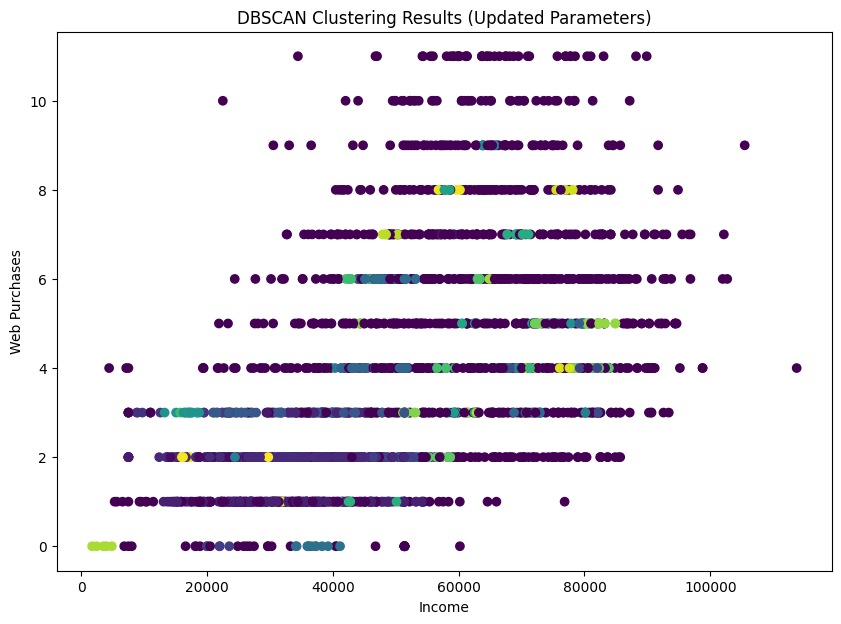

(np.float64(0.273863386479954), 68)

In [39]:
# Масштабування числових змінних
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded[['Income', 'NumWebPurchases', 'NumStorePurchases']])

# Налаштуємо DBSCAN з параметрами eps=0.1 та min_samples=5
dbscan_updated = DBSCAN(eps=0.1, min_samples=5)

# Застосуємо кластеризацію
dbscan_labels_updated = dbscan_updated.fit_predict(scaled_features)

# Перевіряємо кількість кластерів (не рахуючи шуми)
num_clusters_updated = len(set(dbscan_labels_updated)) - (1 if -1 in dbscan_labels_updated else 0)

# Обчислюємо метрику силуету (для DBSCAN - потрібно відкинути шуми, позначені як -1)
if num_clusters_updated > 1:  # Переконуємося, що є хоча б два кластери
    silhouette_dbscan_updated = silhouette_score(scaled_features[dbscan_labels_updated != -1], dbscan_labels_updated[dbscan_labels_updated != -1])
else:
    silhouette_dbscan_updated = "Неможливо обчислити метрику силуету, оскільки є лише один кластер"

# Візуалізація результатів кластеризації DBSCAN
plt.figure(figsize=(10, 7))
plt.scatter(df_encoded['Income'], df_encoded['NumWebPurchases'], c=dbscan_labels_updated, cmap='viridis')
plt.title('DBSCAN Clustering Results (Updated Parameters)')
plt.xlabel('Income')
plt.ylabel('Web Purchases')
plt.show()

silhouette_dbscan_updated, num_clusters_updated

Метрика силуету: 0.27, що все ще вказує на те, що кластери не дуже чітко розмежовані. Це не ідеальний результат, але все ж показує, що класи мають певну структуру.
Кількість кластерів: 68 — DBSCAN визначив 68 кластерів, що свідчить про те, що метод розподілив дані на кілька груп, але якість кластеризації потребує покращення.
